# Construct a convolutional neural network model for classifying the CIFAR-10 dataset. Use the test set of the CIFAR-10 dataset as validation data for the model

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [42]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Load data
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [63]:
#Shape the data

x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

#Normalize to [0,1]
x_train = x_train/255
x_test = x_test/255

#Flatten
y_train = y_train.flatten()
y_test = y_test.flatten()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Softmax

model = Sequential()

#Add layers to neural network
model.add(Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='valid',activation='relu', input_shape=(x_train[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(1, 1), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(1, 1), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(10,activation="softmax"))

#Compile Layer
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,058 (258.04 KB)

 Trainable params: 66,058 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 116ms/step - accuracy: 0.1581 - loss: 2.2171 - val_accuracy: 0.2994 - val_loss: 1.9752
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.2953 - loss: 1.9596 - val_accuracy: 0.3241 - val_loss: 1.8897
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 115ms/step - accuracy: 0.3197 - loss: 1.8831 - val_accuracy: 0.3352 - val_loss: 1.8389
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.3341 - loss: 1.8301 - val_accuracy: 0.3559 - val_loss: 1.7721
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.3579 - loss: 1.7608 - val_accuracy: 0.3800 - val_loss: 1.7056
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 115ms/step - accuracy: 0.3810 - loss: 1.7040 - val_accuracy: 0.3955 - val_loss: 1.6610
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 112ms/step - accuracy: 0.3985 - loss: 1.6512 - val_accuracy: 0.4169 - val_loss: 1.6047
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 117ms/step - accuracy: 0.4146 - los

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4442 - loss: 1.5312
Test Accuracy is  0.4408000111579895


Text(0.5, 1.0, 'Model Losses')

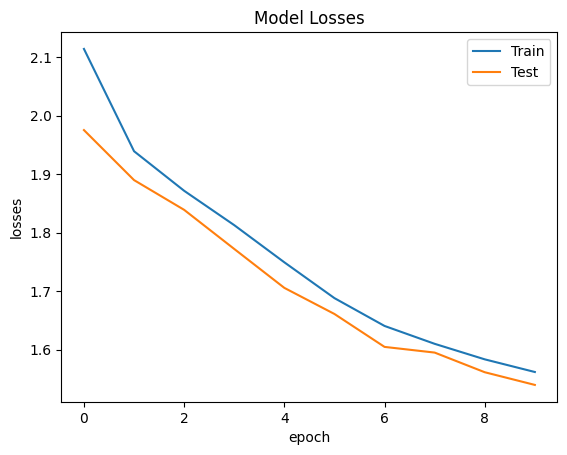

In [67]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy is ", test_acc)

plt.plot(history.history['loss'], label = "Train")
plt.plot(history.history['val_loss'], label = "Test")
plt.ylabel('losses')
plt.xlabel('epoch')
plt.legend()
plt.title('Model Losses')

Text(0.5, 1.0, 'Model Accuracy')

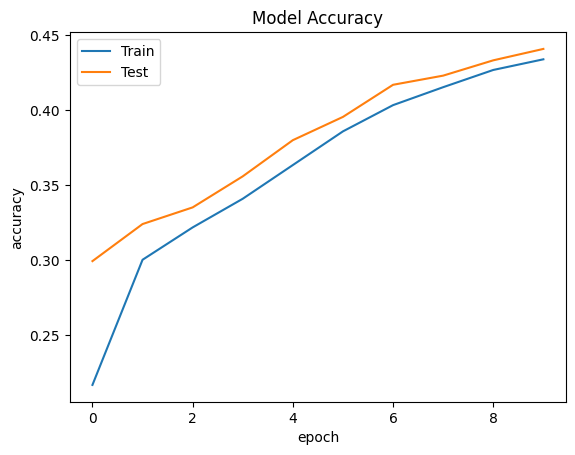

In [68]:
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Test")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.title('Model Accuracy')